In [187]:
# pip install alpha_vantage 
# pip install --upgrade alpha_vantage 
    # to make use of FundamentalData (updated on Sept 2020)

from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.cryptocurrencies import CryptoCurrencies
from alpha_vantage.foreignexchange import ForeignExchange
from alpha_vantage.fundamentaldata import FundamentalData

import matplotlib
import matplotlib.pyplot as plt
import os

#making plots bigger
#matplotlib.rcParams['figure.figsize'] = (50, 20)

# magic function (idk what it does)
#%matplotlib inline

In [114]:
ts = TimeSeries(key = 'NQFFPAG3ZLJNCK5X', output_format = 'pandas')
data = ts.get_intraday("AAPL")

In [115]:
from alpha_vantage.timeseries import TimeSeries

ts = TimeSeries(key = 'NQFFPAG3ZLJNCK5X', output_format = 'pandas')
    #important to have 'pandas' to print

data, meta_data = ts.get_intraday(symbol = "AMZN", interval = '60min', outputsize = 'full')
    # important to have a meta_data after data, otherwise data is a tuple object. 
    # idk what's the purpose, but it is necessary for it to work. 

print(data.head(2))

                     1. open  2. high   3. low  4. close  5. volume
date                                                               
2020-09-25 20:00:00   3088.0   3090.0  3087.30   3087.40     1664.0
2020-09-25 19:00:00   3088.0   3088.0  3086.21   3086.21     1028.0


# Searching and Basic Functions
## Search
Haven't figure out a way to search a ticker or their documentation of each function, but it is possible to get a suggestion page based on webpage input. Consider the following example. Simply change 'keywords=TICKER_YOU_WANT_TO_SEARCH' and 'apikey=YOUR_API_KEY'. 

https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords=hot&apikey=NQFFPAG3ZLJNCK5X

## Directory
Since Python is a bitch, and AlphaVantage's documentation page is not updated for Python, it is hard to tell what are the subsets of each function. Frequently use dir() to check what are the available inputs for each function. 

In [116]:
# Example:
#dir(ts)
#dir(ts.get_daily)

# Plotting
## Time Series 

Since the output format is in pandas, we can use it to plot it's intra-minute price. 

                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2020-09-25 20:00:00   207.05   207.10  207.05    207.10     1074.0
2020-09-25 19:57:00   207.00   207.00  207.00    207.00      541.0
2020-09-25 19:53:00   207.05   207.05  207.05    207.05      305.0
2020-09-25 19:51:00   207.01   207.01  207.00    207.00      524.0
2020-09-25 19:50:00   207.13   207.13  207.13    207.13      149.0


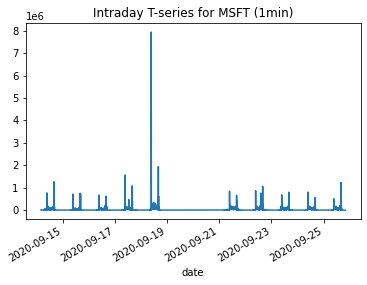

['_ALPHA_VANTAGE_API_URL',
 '_ALPHA_VANTAGE_DIGITAL_CURRENCY_LIST',
 '_ALPHA_VANTAGE_MATH_MAP',
 '_RAPIDAPI_URL',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_append_type',
 '_call_api_on_func',
 '_handle_api_call',
 '_output_format',
 '_output_format_sector',
 'get_daily',
 'get_daily_adjusted',
 'get_intraday',
 'get_monthly',
 'get_monthly_adjusted',
 'get_quote_endpoint',
 'get_symbol_search',
 'get_weekly',
 'get_weekly_adjusted',
 'headers',
 'indexing_type',
 'key',
 'map_to_matype',
 'output_format',
 'proxy',
 'rapidapi',
 'set_proxy',
 'treat_info_as_error']

In [158]:
MSFT_intra, MSFT_meta = ts.get_intraday(symbol = "MSFT", interval = '1min', outputsize = 'full')
print(MSFT_intra.head(5))

MSFT_intra['5. volume'].plot()
    # choose either '1. open', '2. high', etc. It is found from the columns printed from head()
plt.title('Intraday T-series for MSFT (1min)')
plt.show()

## Technical Indicators
You are also allowed to plot technical indicators. Make sure you import Techindicators and change the output format to pandas.

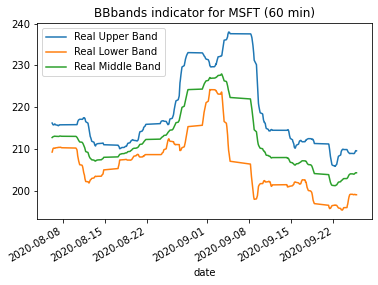

In [173]:
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

ti = TechIndicators(key = 'NQFFPAG3ZLJNCK5X', output_format = 'pandas')
# dir(ti)

MSFT_ti, MSFT_ti_meta = ti.get_bbands(symbol = 'MSFT', interval = '60min', time_period = 50)
    # bbands refers to Bollinger Bands
    # what does the time_period even do?? It doesn't work with daily interval, 
        # nor does it represent the number of observations...
    
MSFT_ti.plot()
plt.title('BBbands indicator for MSFT (60 min)')
plt.show()
    #why does my plot look so ugly? 

In [170]:
dir(ti.get_bbands)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__func__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__wrapped__']

## Sector Performance
We can also plot sector performance with AlphaVantage.

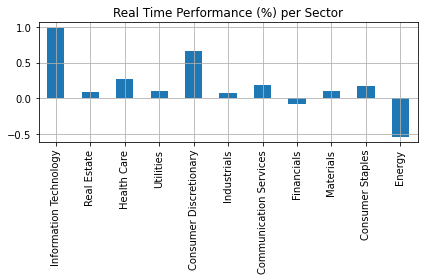

In [119]:
from alpha_vantage.sectorperformance import SectorPerformances
import matplotlib.pyplot as plt

sp = SectorPerformances(key = 'NQFFPAG3ZLJNCK5X', output_format = 'pandas')
# dir(sp)

sector, sector_meta = sp.get_sector()
#print(sector)
    # A list of available columns to print and plot
    # Rank G: 1 Year, H: 3-Year, I: 5-Year, J: 10-year
    
sector['Rank H: Year Performance'].plot(kind = 'bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()

## Cryptocurrencies
AlphaVantage also supports cryptocurrencies like BTC:

            1a. open (EUR)  1b. open (USD)  2a. high (EUR)  2b. high (USD)  \
date                                                                         
2020-09-27     9383.796604        10920.28     9442.727398        10988.86   
2020-09-20     8879.009412        10332.84     9606.793547        11179.79   

            3a. low (EUR)  3b. low (USD)  4a. close (EUR)  4b. close (USD)  \
date                                                                         
2020-09-27    8710.569426       10136.82      9260.409717         10776.69   
2020-09-20    8775.463762       10212.34      9383.796604         10920.28   

                5. volume  6. market cap (USD)  
date                                            
2020-09-27  302319.240343        302319.240343  
2020-09-20  374339.558814        374339.558814  


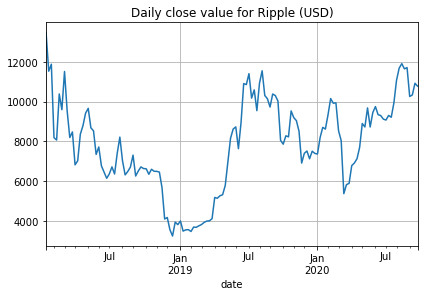

In [134]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import matplotlib.pyplot as plt

cc = CryptoCurrencies(key = 'NQFFPAG3ZLJNCK5X', output_format = 'pandas')
# dir(cc)

XRP_daily, XRP_daily_meta = cc.get_digital_currency_weekly(symbol ='BTC', market ='EUR')
print(XRP_daily.head(2))
    # View the available columns to extract
    # How do you print prices before 2018?
    
XRP_daily['4b. close (USD)'].plot()
plt.tight_layout()
plt.title('Daily close value for Ripple (USD)')
plt.grid()
plt.show()  

## Foreign Exchange (FX)
The forex endpoint has no metadata, so it is only available as json format and pandas. (using the 'csv' format will raise an Error)

In [ ]:
from alpha_vantage.foreignexchange import ForeignExchange
from pprint import pprint

fx = ForeignExchange(key = 'NQFFPAG3ZLJNCK5X')
    # There's no metadata in this call (??)
MYRtoUSD, _ = fx.get_currency_exchange_rate(from_currency= 'MYR', to_currency = 'USD')
pprint(MYRtoUSD)
    # to make things more neat

# MYRtoUSD['5. Exchange Rate'].plot()
# plt.tight_layout()
# plt.title('Daily close value for Ripple (USD)')
# plt.grid()
# plt.show()  


## End of Tutorial

# Testing Data

In [135]:
dir(ti)

['_ALPHA_VANTAGE_API_URL',
 '_ALPHA_VANTAGE_DIGITAL_CURRENCY_LIST',
 '_ALPHA_VANTAGE_MATH_MAP',
 '_RAPIDAPI_URL',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_append_type',
 '_call_api_on_func',
 '_handle_api_call',
 '_output_format',
 '_output_format_sector',
 'get_ad',
 'get_adosc',
 'get_adx',
 'get_adxr',
 'get_apo',
 'get_aroon',
 'get_aroonosc',
 'get_atr',
 'get_bbands',
 'get_bop',
 'get_cci',
 'get_cmo',
 'get_dema',
 'get_dx',
 'get_ema',
 'get_ht_dcperiod',
 'get_ht_dcphase',
 'get_ht_phasor',
 'get_ht_sine',
 'get_ht_trendline',
 'get_ht_trendmode',
 'get_kama',
 'get_macd',
 'get_macdext',
 'get_mama',
 'get_mfi',
 'get_midpoint',
 'get_midprice',
 'g

                SMA
date               
2000-01-11  31.9904
2000-01-12  32.0764
                WMA
date               
2000-01-11  33.8182
2000-01-12  33.8909
            1. open  2. high  3. low  4. close  5. adjusted close   6. volume  \
date                                                                            
2020-09-25   203.55   209.04  202.54    207.82             207.82  29437312.0   
2020-09-24   199.85   205.57  199.20    203.19             203.19  31202493.0   

            7. dividend amount  8. split coefficient  
date                                                  
2020-09-25                 0.0                   1.0  
2020-09-24                 0.0                   1.0  
                RSI
date               
2020-08-31  85.6510
2020-09-25  75.5467


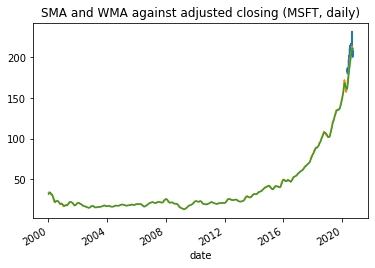

AttributeError: 'AxesSubplot' object has no attribute 'plt'

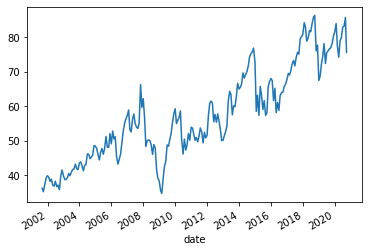

In [177]:
msft_p, r = ts.get_daily_adjusted(symbol = 'MSFT', outputsize = '50')
msft_sma, re = ti.get_sma(symbol = 'MSFT', interval = 'daily', time_period = 50)
msft_wma, ree = ti.get_wma(symbol = 'MSFT', interval = 'daily', time_period = 50)
    # you still need a metadata for the plots to work
    # metadata uses the same name, yet it still works..? 
        # Technical indicators have a 50-day delay, does the plot accurately capture that?
            # Answer: Yes. Note the blue line is much shorter than green and yellow. 
        # Yes, the outputsize for TimeSeries and TechIndicator is inconsistent. 
            # Annoying I know... 
print(msft_sma.head(2))
print(msft_wma.head(2))
print(msft_p.head(2))

# Monthly RSI. (Daily RSI is too noisy to predict)
msft_rsi, r = ti.get_rsi(symbol = 'MSFT', interval = 'monthly')
print(msft_rsi.tail(2))

#Plotting
msft_p['4. close'].plot()
msft_wma['WMA'].plot()
msft_sma['SMA'].plot()
    # you are allowed to plot in the same chart. 
    # what if I want to separate the chart? 
plt.title('SMA and WMA against adjusted closing (MSFT, daily)')
plt.show()

# Separate plot. (how do you rename the 2nd plot?)
rsi = msft_rsi['RSI'].plot()
rsi.plt.title('test')
rsi.plt.show()

# Update 25 September 2020

## Fundamental Data
You may now obtain fundamental data from AlphaVantage's API. Remember to use dir() to find out the available functions. 

In [186]:
from alpha_vantage.fundamentaldata import FundamentalData

fd = FundamentalData(key = 'NQFFPAG3ZLJNCK5X', output_format = 'pandas')
MSFTfd, d = fd.get_company_overview(symbol = 'MSFT')
    # Seems like the key isn't fixed for fundamental data yet

KeyError: None

## Stock Prediction with Agatha
Using LSTM network, Agatha aims to predict close prices for a user-specified number of days into the future. The training data used for reference comes from AlphaVantage. 

In [190]:
# pip install agatha
from agatha import getOrTrainModel, predictFuture

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`